In [4]:
import pandas as pd

In [5]:
data = pd.read_csv("../Senate_election_prediction/1976_2018_senate.csv", encoding = 'unicode_escape', index_col = 'year')

In [6]:
data.head(5)

,state,state_po,state_fips,state_cen,state_ic,office,district,stage,special,candidate,party,writein,mode,candidatevotes,totalvotes,unofficial,version
year,,,,,,,,,,,,,,,,,
1976,Arizona,AZ,4,86,61,US Senate,statewide,gen,False,Sam Steiger,republican,False,total,321236,741210,False,20171011.0
1976,Arizona,AZ,4,86,61,US Senate,statewide,gen,False,Wm. Mathews Feighan,independent,False,total,1565,741210,False,20171011.0
1976,Arizona,AZ,4,86,61,US Senate,statewide,gen,False,Dennis DeConcini,democrat,False,total,400334,741210,False,20171011.0
1976,Arizona,AZ,4,86,61,US Senate,statewide,gen,False,Allan Norwitz,libertarian,False,total,7310,741210,False,20171011.0
1976,Arizona,AZ,4,86,61,US Senate,statewide,gen,False,Bob Field,independent,False,total,10765,741210,False,20171011.0


In [7]:
data.count()

state             3421
state_po          3421
state_fips        3421
state_cen         3421
state_ic          3421
office            3421
district          3421
stage             3421
special           3421
candidate         3011
party             2858
writein           3421
mode              3421
candidatevotes    3421
totalvotes        3421
unofficial        3421
version           3420
dtype: int64

In [8]:
senate_2016 = data.loc[['2016']]
senate_2014 = data.loc[['2014']]
senate_2018 = data.loc[['2018']]
# print(senate_2016.head(5))
# print(senate_2014.head(5))
# print(senate_2018.head(5))

In [9]:
senate_2014.reset_index(inplace = True)
senate_2016.reset_index(inplace = True)
senate_2018.reset_index(inplace = True)

In [10]:
senate_2014.columns

Index(['year', 'state', 'state_po', 'state_fips', 'state_cen', 'state_ic',
       'office', 'district', 'stage', 'special', 'candidate', 'party',
       'writein', 'mode', 'candidatevotes', 'totalvotes', 'unofficial',
       'version'],
      dtype='object')

In [11]:
senate_2014 = senate_2014[['year','state','state_fips','stage','special','candidate','party','candidatevotes','totalvotes']]
senate_2016 = senate_2016[['year','state','state_fips','stage','special','candidate','party','candidatevotes','totalvotes']]
senate_2018 = senate_2018[['year','state','state_fips','stage','special','candidate','party','candidatevotes','totalvotes']]

In [12]:
max_votes_14 = senate_2014.groupby('state')['candidatevotes'].max()   
max_votes_14 = pd.DataFrame(max_votes_14)
max_votes_14.head()

,candidatevotes
state,
Alabama,795606
Alaska,135445
Arkansas,478819
Colorado,983891
Delaware,130655


In [13]:
senate_2014_maxvotes = max_votes_14.merge(senate_2014[['year','state','state_fips','stage','special','candidate','party','candidatevotes','totalvotes']],\
                          on = "state",  how = "left")
senate_2014_maxvotes

,state,candidatevotes_x,year,state_fips,stage,special,candidate,party,candidatevotes_y,totalvotes
0,Alabama,795606,2014,1,gen,False,NaN,NaN,22484,818090
1,Alabama,795606,2014,1,gen,False,Jeff Sessions,republican,795606,818090
2,Alaska,135445,2014,2,gen,False,NaN,NaN,1376,282400
3,Alaska,135445,2014,2,gen,False,Mark Begich,democrat,129431,282400
4,Alaska,135445,2014,2,gen,False,Mark S. Fish,libertarian,10512,282400
...,...,...,...,...,...,...,...,...,...,...
182,Wyoming,121554,2014,56,gen,False,Joseph S. Porambo,libertarian,3677,171153
183,Wyoming,121554,2014,56,gen,False,Blank Vote,NaN,2633,171153
184,Wyoming,121554,2014,56,gen,False,NaN,NaN,471,171153
185,Wyoming,121554,2014,56,gen,False,Michael B. Enzi,republican,121554,171153


In [14]:
senate_2014_maxvotes_final = senate_2014_maxvotes[senate_2014_maxvotes.candidatevotes_x == senate_2014_maxvotes.candidatevotes_y]
senate_2014_maxvotes_final.drop(columns ='candidatevotes_x', inplace = True)
senate_2014_maxvotes_final = senate_2014_maxvotes_final.rename(columns = {"candidatevotes_y": "candidatevotes"})
senate_2014_maxvotes_final

/Users/mckennamiranda/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,state,year,state_fips,stage,special,candidate,party,candidatevotes,totalvotes
1,Alabama,2014,1,gen,False,Jeff Sessions,republican,795606,818090
6,Alaska,2014,2,gen,False,Dan Sullivan,republican,135445,282400
7,Arkansas,2014,5,gen,False,Tom Cotton,republican,478819,847505
14,Colorado,2014,8,gen,False,Cory Gardner,republican,983891,2041058
21,Delaware,2014,10,gen,False,Christopher A. Coons,democrat,130655,234038
23,Georgia,2014,13,gen,False,David A. Perdue,republican,1358088,2567805
32,Hawaii,2014,15,gen,True,Brian Schatz,democrat,246827,369703
35,Idaho,2014,16,gen,False,James E. Risch,republican,285596,437170
36,Illinois,2014,17,gen,False,Richard J. Durbin,democrat,1929637,3603519
47,Iowa,2014,19,gen,False,Joni Ernst,republican,588575,1129700


In [15]:
max_votes_16 = senate_2016.groupby('state')['candidatevotes'].max()   
max_votes_16 = pd.DataFrame(max_votes_16)
senate_2016_maxvotes = max_votes_16.merge(senate_2016[['year','state','state_fips','stage','special','candidate','party','candidatevotes','totalvotes']],\
                          on = "state",  how = "left")

senate_2016_maxvotes_final = senate_2016_maxvotes[senate_2016_maxvotes.candidatevotes_x == senate_2016_maxvotes.candidatevotes_y]
senate_2016_maxvotes_final.drop(columns ='candidatevotes_x', inplace = True)
senate_2016_maxvotes_final = senate_2016_maxvotes_final.rename(columns = {"candidatevotes_y": "candidatevotes"})
senate_2016_maxvotes_final

/Users/mckennamiranda/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,state,year,state_fips,stage,special,candidate,party,candidatevotes,totalvotes
1,Alabama,2016,1,gen,False,Richard C. Shelby,republican,1335104,2087444
8,Alaska,2016,2,gen,False,Lisa Murkowski,republican,138149,311441
17,Arizona,2016,4,gen,False,John McCain,republican,1359267,2530730
21,Arkansas,2016,5,gen,False,John Boozman,republican,661984,1107522
26,California,2016,6,gen,False,Kamala D. Harris,democrat,7542753,12244170
29,Colorado,2016,8,gen,False,Michael F. Bennet,democrat,1370710,2743023
34,Connecticut,2016,9,gen,False,Richard Blumenthal,democrat,920766,1596276
51,Florida,2016,12,gen,False,Marco Rubio,republican,4835191,9301820
56,Georgia,2016,13,gen,False,Johnny Isakson,republican,2135806,3898605
61,Hawaii,2016,15,gen,False,Brian Schatz,democrat,306604,437664


In [16]:
max_votes_18 = senate_2018.groupby('state')['candidatevotes'].max()   
max_votes_18 = pd.DataFrame(max_votes_18)
senate_2018_maxvotes = max_votes_18.merge(senate_2018[['year','state','state_fips','stage','special','candidate','party','candidatevotes','totalvotes']],\
                          on = "state",  how = "left")

senate_2018_maxvotes_final = senate_2018_maxvotes[senate_2018_maxvotes.candidatevotes_x == senate_2018_maxvotes.candidatevotes_y]
senate_2018_maxvotes_final.drop(columns ='candidatevotes_x', inplace = True)
senate_2018_maxvotes_final = senate_2018_maxvotes_final.rename(columns = {"candidatevotes_y": "candidatevotes"})
senate_2018_maxvotes_final

/Users/mckennamiranda/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,state,year,state_fips,stage,special,candidate,party,candidatevotes,totalvotes
1,Arizona,2018,4,gen,False,Kyrsten Sinema,democrat,1191100,2384308
4,California,2018,6,gen,False,Dianne Feinstein,democrat,6019422,11113364
6,Connecticut,2018,9,gen,False,Christopher S Murphy,democrat,787685,1386840
12,Delaware,2018,10,gen,False,Thomas R Carper,democrat,217385,362592
16,Florida,2018,12,gen,False,Rick Scott,republican,4099505,8190005
19,Hawaii,2018,15,gen,False,Mazie K. Hirono,democrat,276316,388351
21,Indiana,2018,18,gen,False,Mike Braun,republican,1158000,2282565
26,Maine,2018,23,gen,False,"Angus S. King, Jr.",independent,344575,634409
30,Maryland,2018,24,gen,False,Ben Cardin,democrat,1491614,2299889
34,Massachusetts,2018,25,gen,False,Elizabeth A. Warren,democrat,1633371,2707090


In [17]:
##senate_2014_maxvotes_final.to_csv('../Senate_election_prediction/senate_2014.csv')
##senate_2016_maxvotes_final.to_csv('../Senate_election_prediction/senate_2016.csv')
##senate_2018_maxvotes_final.to_csv('../Senate_election_prediction/senate_2018.csv')

#  Data analysis for 2014, 2016 and 2018

In [18]:
senate_2014_maxvotes_final

,state,year,state_fips,stage,special,candidate,party,candidatevotes,totalvotes
1,Alabama,2014,1,gen,False,Jeff Sessions,republican,795606,818090
6,Alaska,2014,2,gen,False,Dan Sullivan,republican,135445,282400
7,Arkansas,2014,5,gen,False,Tom Cotton,republican,478819,847505
14,Colorado,2014,8,gen,False,Cory Gardner,republican,983891,2041058
21,Delaware,2014,10,gen,False,Christopher A. Coons,democrat,130655,234038
23,Georgia,2014,13,gen,False,David A. Perdue,republican,1358088,2567805
32,Hawaii,2014,15,gen,True,Brian Schatz,democrat,246827,369703
35,Idaho,2014,16,gen,False,James E. Risch,republican,285596,437170
36,Illinois,2014,17,gen,False,Richard J. Durbin,democrat,1929637,3603519
47,Iowa,2014,19,gen,False,Joni Ernst,republican,588575,1129700


In [19]:
#senate_2014.party.unique()

In [20]:
#senate_2016.groupby(['party']).count()

In [21]:
#senate_2016.groupby(['party']).count()

In [22]:
#senate_2018.groupby(['party']).count()

In [23]:
senate_combined = senate_2014_maxvotes_final.append([senate_2016_maxvotes_final,senate_2018_maxvotes_final])

In [24]:
senate_combined.party.unique()

array(['republican', 'democrat', 'independent', 'democratic-farmer-labor'],
      dtype=object)

In [25]:
#groupby_by_year = senate_combined.groupby(['year']).count()
#groupby_by_year

In [26]:
senate_combined_democratic = senate_combined.loc[senate_combined['party'] == 'democrat']
#senate_combined_democratic
senate_combined_republican = senate_combined.loc[senate_combined['party'] == 'republican']
#senate_combined_independent = senate_combined.loc[senate_combined['party'] == 'independent']
#senate_combined_green = senate_combined.loc[senate_combined['party'] == 'green']
#senate_combined_liberitarian = senate_combined[senate_combined['party'] =='libertarian']

In [27]:
senate_combined_final = senate_combined_democratic.append([senate_combined_republican])
senate_combined_final

,state,year,state_fips,stage,special,candidate,party,candidatevotes,totalvotes
21,Delaware,2014,10,gen,False,Christopher A. Coons,democrat,130655,234038
32,Hawaii,2014,15,gen,True,Brian Schatz,democrat,246827,369703
36,Illinois,2014,17,gen,False,Richard J. Durbin,democrat,1929637,3603519
75,Massachusetts,2014,25,gen,False,Edward J. Markey,democrat,1289944,2186789
80,Michigan,2014,26,gen,False,Gary C. Peters,democrat,1704936,3121771
...,...,...,...,...,...,...,...,...,...
97,North Dakota,2018,38,gen,False,Kevin Cramer,republican,179720,326138
110,Tennessee,2018,47,gen,False,Marsha Blackburn,republican,1227483,2243740
118,Texas,2018,48,gen,False,Ted Cruz,republican,4260553,8371655
121,Utah,2018,49,gen,False,Mitt Romney,republican,665215,1062845


In [28]:
#groupby_year_final = senate_combined_final.groupby(['year']).count()
#groupby_year_final

In [29]:
#senate_combined_final.party.unique()

In [30]:
#senate_combined_final.columns

In [31]:
#senate_combined_final.state_fips.unique()

In [32]:
senate_combined_final

,state,year,state_fips,stage,special,candidate,party,candidatevotes,totalvotes
21,Delaware,2014,10,gen,False,Christopher A. Coons,democrat,130655,234038
32,Hawaii,2014,15,gen,True,Brian Schatz,democrat,246827,369703
36,Illinois,2014,17,gen,False,Richard J. Durbin,democrat,1929637,3603519
75,Massachusetts,2014,25,gen,False,Edward J. Markey,democrat,1289944,2186789
80,Michigan,2014,26,gen,False,Gary C. Peters,democrat,1704936,3121771
...,...,...,...,...,...,...,...,...,...
97,North Dakota,2018,38,gen,False,Kevin Cramer,republican,179720,326138
110,Tennessee,2018,47,gen,False,Marsha Blackburn,republican,1227483,2243740
118,Texas,2018,48,gen,False,Ted Cruz,republican,4260553,8371655
121,Utah,2018,49,gen,False,Mitt Romney,republican,665215,1062845


In [33]:
#senate_combined_final.reset_index(inplace = True)
senate_analysis = senate_combined_final
#senate_analysis['year'] = senate_analysis['year'].astype(int)

In [34]:
#senate_analysis.reset_index()

In [35]:
senate_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 21 to 148
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   state           98 non-null     object
 1   year            98 non-null     int64 
 2   state_fips      98 non-null     int64 
 3   stage           98 non-null     object
 4   special         98 non-null     bool  
 5   candidate       98 non-null     object
 6   party           98 non-null     object
 7   candidatevotes  98 non-null     int64 
 8   totalvotes      98 non-null     int64 
dtypes: bool(1), int64(4), object(4)
memory usage: 7.0+ KB


In [36]:
#senate_analysis.to_csv('../Senate_election_prediction/senate_analysis.csv')

### Machine learning

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore', FutureWarning)

In [38]:
election = senate_analysis
X = election[['party', 'year']]
y = election["state_fips"].values.reshape(-1, 1)
print(X.shape, y.shape)

(98, 2) (98, 1)


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [40]:
data = X.copy()
data_binary_encoded = pd.get_dummies(data, columns=["party"])
data_binary_encoded.head()

,year,party_democrat,party_republican
21,2014,1,0
32,2014,1,0
36,2014,1,0
75,2014,1,0
80,2014,1,0


In [41]:
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,year,party_democrat,party_republican
73,2018,1,0
128,2014,1,0
168,2016,0,1
168,2014,1,0
185,2014,0,1


In [42]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

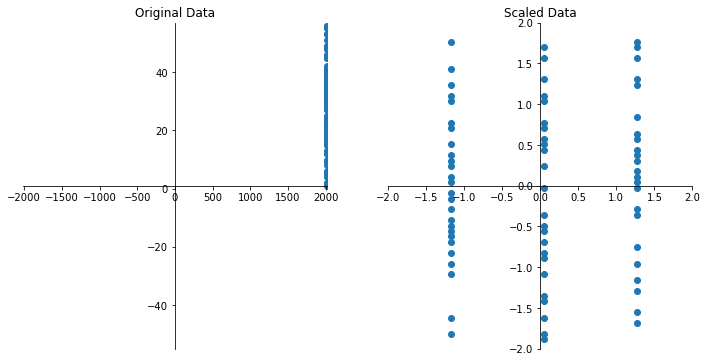

In [43]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["year"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["year"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

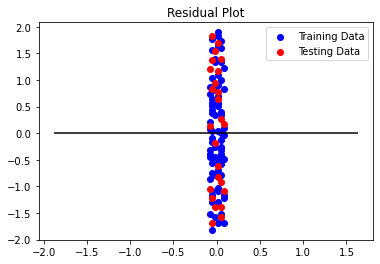

In [44]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="red", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [45]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.3162377421764424, R2: 0.010917949507052827


# Exporting to csv

In [46]:
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [47]:
X_train = model.predict(X_train_scaled)
y_train =  (model.predict(X_train_scaled) - y_train_scaled)
X_test = model.predict(X_test_scaled)
y_test = (model.predict(X_test_scaled) - y_test_scaled)

In [48]:
X_train = pd.DataFrame(np.array(X_train), columns = ['X_train'])
y_train = pd.DataFrame(np.array(y_train), columns = ['y_train'])
X_test = pd.DataFrame(np.array(X_test), columns = ['X_test'])
y_test = pd.DataFrame(np.array(y_test), columns = ['y_test'])

In [49]:
trained_df = pd.concat([X_train,y_train], axis = 1)

In [50]:
trained_df.to_csv('senate_trained.csv')

# Testing Deep Learning Model

In [77]:
voice = senate_analysis

X = election[['party', 'year']]
y = election["state_fips"]
print(X.shape, y.shape)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

data = X.copy()
data_binary_encoded = pd.get_dummies(data, columns=["party"])
data_binary_encoded.head()

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


(98, 2) (98,)


In [78]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y)
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [79]:
# Transform the training and testing data using the X_scaler

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [80]:
from tensorflow.keras.utils import to_categorical

In [81]:
# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=57, activation='relu', input_dim=3))
model.add(Dense(units=57, activation='softmax'))

In [83]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 57)                228       
_________________________________________________________________
dense_9 (Dense)              (None, 57)                3306      
Total params: 3,534
Trainable params: 3,534
Non-trainable params: 0
_________________________________________________________________


In [84]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [85]:
# Fit the model to the training data
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
3/3 - 0s - loss: 4.0921 - accuracy: 0.0000e+00
Epoch 2/100
3/3 - 0s - loss: 4.0667 - accuracy: 0.0000e+00
Epoch 3/100
3/3 - 0s - loss: 4.0444 - accuracy: 0.0137
Epoch 4/100
3/3 - 0s - loss: 4.0236 - accuracy: 0.0137
Epoch 5/100
3/3 - 0s - loss: 4.0038 - accuracy: 0.0137
Epoch 6/100
3/3 - 0s - loss: 3.9833 - accuracy: 0.0137
Epoch 7/100
3/3 - 0s - loss: 3.9638 - accuracy: 0.0137
Epoch 8/100
3/3 - 0s - loss: 3.9440 - accuracy: 0.0274
Epoch 9/100
3/3 - 0s - loss: 3.9248 - accuracy: 0.0274
Epoch 10/100
3/3 - 0s - loss: 3.9055 - accuracy: 0.0411
Epoch 11/100
3/3 - 0s - loss: 3.8866 - accuracy: 0.0411
Epoch 12/100
3/3 - 0s - loss: 3.8676 - accuracy: 0.0411
Epoch 13/100
3/3 - 0s - loss: 3.8485 - accuracy: 0.0411
Epoch 14/100
3/3 - 0s - loss: 3.8295 - accuracy: 0.0548
Epoch 15/100
3/3 - 0s - loss: 3.8104 - accuracy: 0.0685
Epoch 16/100
3/3 - 0s - loss: 3.7910 - accuracy: 0.0685
Epoch 17/100
3/3 - 0s - loss: 3.7718 - accuracy: 0.0685
Epoch 18/100
3/3 - 0s - loss: 3.7516 - accuracy: 

In [86]:
deep_model = Sequential()
deep_model.add(Dense(units=57, activation='relu', input_dim=3))
deep_model.add(Dense(units=57, activation='softmax'))

In [87]:
deep_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 57)                228       
_________________________________________________________________
dense_11 (Dense)             (None, 57)                3306      
Total params: 3,534
Trainable params: 3,534
Non-trainable params: 0
_________________________________________________________________


In [88]:
deep_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [89]:
deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=1000,
    shuffle=True,
    verbose=2
)

Epoch 1/1000
3/3 - 0s - loss: 4.0655 - accuracy: 0.0000e+00
Epoch 2/1000
3/3 - 0s - loss: 4.0387 - accuracy: 0.0137
Epoch 3/1000
3/3 - 0s - loss: 4.0168 - accuracy: 0.0137
Epoch 4/1000
3/3 - 0s - loss: 3.9953 - accuracy: 0.0137
Epoch 5/1000
3/3 - 0s - loss: 3.9742 - accuracy: 0.0274
Epoch 6/1000
3/3 - 0s - loss: 3.9538 - accuracy: 0.0274
Epoch 7/1000
3/3 - 0s - loss: 3.9332 - accuracy: 0.0274
Epoch 8/1000
3/3 - 0s - loss: 3.9128 - accuracy: 0.0274
Epoch 9/1000
3/3 - 0s - loss: 3.8926 - accuracy: 0.0411
Epoch 10/1000
3/3 - 0s - loss: 3.8725 - accuracy: 0.0411
Epoch 11/1000
3/3 - 0s - loss: 3.8528 - accuracy: 0.0411
Epoch 12/1000
3/3 - 0s - loss: 3.8331 - accuracy: 0.0411
Epoch 13/1000
3/3 - 0s - loss: 3.8130 - accuracy: 0.0685
Epoch 14/1000
3/3 - 0s - loss: 3.7934 - accuracy: 0.0685
Epoch 15/1000
3/3 - 0s - loss: 3.7735 - accuracy: 0.0685
Epoch 16/1000
3/3 - 0s - loss: 3.7536 - accuracy: 0.0685
Epoch 17/1000
3/3 - 0s - loss: 3.7338 - accuracy: 0.0685
Epoch 18/1000
3/3 - 0s - loss: 3.713

3/3 - 0s - loss: 2.7556 - accuracy: 0.0822
Epoch 145/1000
3/3 - 0s - loss: 2.7531 - accuracy: 0.0959
Epoch 146/1000
3/3 - 0s - loss: 2.7518 - accuracy: 0.0822
Epoch 147/1000
3/3 - 0s - loss: 2.7513 - accuracy: 0.0822
Epoch 148/1000
3/3 - 0s - loss: 2.7490 - accuracy: 0.0822
Epoch 149/1000
3/3 - 0s - loss: 2.7479 - accuracy: 0.0822
Epoch 150/1000
3/3 - 0s - loss: 2.7458 - accuracy: 0.0822
Epoch 151/1000
3/3 - 0s - loss: 2.7442 - accuracy: 0.0822
Epoch 152/1000
3/3 - 0s - loss: 2.7433 - accuracy: 0.0822
Epoch 153/1000
3/3 - 0s - loss: 2.7419 - accuracy: 0.0822
Epoch 154/1000
3/3 - 0s - loss: 2.7403 - accuracy: 0.0822
Epoch 155/1000
3/3 - 0s - loss: 2.7385 - accuracy: 0.0822
Epoch 156/1000
3/3 - 0s - loss: 2.7374 - accuracy: 0.0822
Epoch 157/1000
3/3 - 0s - loss: 2.7357 - accuracy: 0.0822
Epoch 158/1000
3/3 - 0s - loss: 2.7348 - accuracy: 0.0822
Epoch 159/1000
3/3 - 0s - loss: 2.7331 - accuracy: 0.0822
Epoch 160/1000
3/3 - 0s - loss: 2.7322 - accuracy: 0.0822
Epoch 161/1000
3/3 - 0s - los

Epoch 286/1000
3/3 - 0s - loss: 2.6365 - accuracy: 0.0822
Epoch 287/1000
3/3 - 0s - loss: 2.6362 - accuracy: 0.0959
Epoch 288/1000
3/3 - 0s - loss: 2.6362 - accuracy: 0.0822
Epoch 289/1000
3/3 - 0s - loss: 2.6355 - accuracy: 0.0822
Epoch 290/1000
3/3 - 0s - loss: 2.6354 - accuracy: 0.0822
Epoch 291/1000
3/3 - 0s - loss: 2.6348 - accuracy: 0.0822
Epoch 292/1000
3/3 - 0s - loss: 2.6346 - accuracy: 0.0822
Epoch 293/1000
3/3 - 0s - loss: 2.6346 - accuracy: 0.0822
Epoch 294/1000
3/3 - 0s - loss: 2.6338 - accuracy: 0.0822
Epoch 295/1000
3/3 - 0s - loss: 2.6338 - accuracy: 0.0822
Epoch 296/1000
3/3 - 0s - loss: 2.6332 - accuracy: 0.0822
Epoch 297/1000
3/3 - 0s - loss: 2.6323 - accuracy: 0.0822
Epoch 298/1000
3/3 - 0s - loss: 2.6322 - accuracy: 0.0822
Epoch 299/1000
3/3 - 0s - loss: 2.6323 - accuracy: 0.0822
Epoch 300/1000
3/3 - 0s - loss: 2.6318 - accuracy: 0.0822
Epoch 301/1000
3/3 - 0s - loss: 2.6321 - accuracy: 0.0822
Epoch 302/1000
3/3 - 0s - loss: 2.6312 - accuracy: 0.0822
Epoch 303/1000

3/3 - 0s - loss: 2.5994 - accuracy: 0.0685
Epoch 428/1000
3/3 - 0s - loss: 2.6003 - accuracy: 0.0822
Epoch 429/1000
3/3 - 0s - loss: 2.5995 - accuracy: 0.0822
Epoch 430/1000
3/3 - 0s - loss: 2.5988 - accuracy: 0.0822
Epoch 431/1000
3/3 - 0s - loss: 2.5993 - accuracy: 0.0822
Epoch 432/1000
3/3 - 0s - loss: 2.5996 - accuracy: 0.0822
Epoch 433/1000
3/3 - 0s - loss: 2.5990 - accuracy: 0.0822
Epoch 434/1000
3/3 - 0s - loss: 2.5988 - accuracy: 0.0822
Epoch 435/1000
3/3 - 0s - loss: 2.5976 - accuracy: 0.0822
Epoch 436/1000
3/3 - 0s - loss: 2.5977 - accuracy: 0.0822
Epoch 437/1000
3/3 - 0s - loss: 2.5979 - accuracy: 0.0822
Epoch 438/1000
3/3 - 0s - loss: 2.5976 - accuracy: 0.0822
Epoch 439/1000
3/3 - 0s - loss: 2.5974 - accuracy: 0.0822
Epoch 440/1000
3/3 - 0s - loss: 2.5966 - accuracy: 0.0822
Epoch 441/1000
3/3 - 0s - loss: 2.5964 - accuracy: 0.0822
Epoch 442/1000
3/3 - 0s - loss: 2.5968 - accuracy: 0.0822
Epoch 443/1000
3/3 - 0s - loss: 2.5968 - accuracy: 0.0822
Epoch 444/1000
3/3 - 0s - los

Epoch 569/1000
3/3 - 0s - loss: 2.5822 - accuracy: 0.0822
Epoch 570/1000
3/3 - 0s - loss: 2.5824 - accuracy: 0.0822
Epoch 571/1000
3/3 - 0s - loss: 2.5823 - accuracy: 0.0822
Epoch 572/1000
3/3 - 0s - loss: 2.5819 - accuracy: 0.0822
Epoch 573/1000
3/3 - 0s - loss: 2.5817 - accuracy: 0.0685
Epoch 574/1000
3/3 - 0s - loss: 2.5820 - accuracy: 0.0822
Epoch 575/1000
3/3 - 0s - loss: 2.5825 - accuracy: 0.0822
Epoch 576/1000
3/3 - 0s - loss: 2.5824 - accuracy: 0.0685
Epoch 577/1000
3/3 - 0s - loss: 2.5823 - accuracy: 0.0822
Epoch 578/1000
3/3 - 0s - loss: 2.5825 - accuracy: 0.0822
Epoch 579/1000
3/3 - 0s - loss: 2.5822 - accuracy: 0.0822
Epoch 580/1000
3/3 - 0s - loss: 2.5818 - accuracy: 0.0685
Epoch 581/1000
3/3 - 0s - loss: 2.5824 - accuracy: 0.0822
Epoch 582/1000
3/3 - 0s - loss: 2.5823 - accuracy: 0.0822
Epoch 583/1000
3/3 - 0s - loss: 2.5825 - accuracy: 0.0685
Epoch 584/1000
3/3 - 0s - loss: 2.5832 - accuracy: 0.0822
Epoch 585/1000
3/3 - 0s - loss: 2.5832 - accuracy: 0.0822
Epoch 586/1000

3/3 - 0s - loss: 2.5760 - accuracy: 0.0822
Epoch 711/1000
3/3 - 0s - loss: 2.5755 - accuracy: 0.0685
Epoch 712/1000
3/3 - 0s - loss: 2.5750 - accuracy: 0.0685
Epoch 713/1000
3/3 - 0s - loss: 2.5743 - accuracy: 0.0822
Epoch 714/1000
3/3 - 0s - loss: 2.5745 - accuracy: 0.0959
Epoch 715/1000
3/3 - 0s - loss: 2.5744 - accuracy: 0.0685
Epoch 716/1000
3/3 - 0s - loss: 2.5740 - accuracy: 0.0822
Epoch 717/1000
3/3 - 0s - loss: 2.5743 - accuracy: 0.0822
Epoch 718/1000
3/3 - 0s - loss: 2.5734 - accuracy: 0.0822
Epoch 719/1000
3/3 - 0s - loss: 2.5733 - accuracy: 0.0822
Epoch 720/1000
3/3 - 0s - loss: 2.5737 - accuracy: 0.0822
Epoch 721/1000
3/3 - 0s - loss: 2.5723 - accuracy: 0.0822
Epoch 722/1000
3/3 - 0s - loss: 2.5733 - accuracy: 0.0822
Epoch 723/1000
3/3 - 0s - loss: 2.5730 - accuracy: 0.0959
Epoch 724/1000
3/3 - 0s - loss: 2.5731 - accuracy: 0.0822
Epoch 725/1000
3/3 - 0s - loss: 2.5734 - accuracy: 0.0685
Epoch 726/1000
3/3 - 0s - loss: 2.5740 - accuracy: 0.0822
Epoch 727/1000
3/3 - 0s - los

Epoch 852/1000
3/3 - 0s - loss: 2.5686 - accuracy: 0.0822
Epoch 853/1000
3/3 - 0s - loss: 2.5690 - accuracy: 0.0822
Epoch 854/1000
3/3 - 0s - loss: 2.5687 - accuracy: 0.0822
Epoch 855/1000
3/3 - 0s - loss: 2.5695 - accuracy: 0.0959
Epoch 856/1000
3/3 - 0s - loss: 2.5690 - accuracy: 0.0822
Epoch 857/1000
3/3 - 0s - loss: 2.5703 - accuracy: 0.0822
Epoch 858/1000
3/3 - 0s - loss: 2.5702 - accuracy: 0.0822
Epoch 859/1000
3/3 - 0s - loss: 2.5704 - accuracy: 0.0685
Epoch 860/1000
3/3 - 0s - loss: 2.5700 - accuracy: 0.0822
Epoch 861/1000
3/3 - 0s - loss: 2.5695 - accuracy: 0.0822
Epoch 862/1000
3/3 - 0s - loss: 2.5699 - accuracy: 0.0822
Epoch 863/1000
3/3 - 0s - loss: 2.5691 - accuracy: 0.0822
Epoch 864/1000
3/3 - 0s - loss: 2.5687 - accuracy: 0.0685
Epoch 865/1000
3/3 - 0s - loss: 2.5685 - accuracy: 0.0959
Epoch 866/1000
3/3 - 0s - loss: 2.5687 - accuracy: 0.0822
Epoch 867/1000
3/3 - 0s - loss: 2.5688 - accuracy: 0.0822
Epoch 868/1000
3/3 - 0s - loss: 2.5701 - accuracy: 0.0822
Epoch 869/1000

3/3 - 0s - loss: 2.5665 - accuracy: 0.0822
Epoch 994/1000
3/3 - 0s - loss: 2.5671 - accuracy: 0.0822
Epoch 995/1000
3/3 - 0s - loss: 2.5671 - accuracy: 0.0822
Epoch 996/1000
3/3 - 0s - loss: 2.5671 - accuracy: 0.0822
Epoch 997/1000
3/3 - 0s - loss: 2.5667 - accuracy: 0.0822
Epoch 998/1000
3/3 - 0s - loss: 2.5666 - accuracy: 0.0822
Epoch 999/1000
3/3 - 0s - loss: 2.5665 - accuracy: 0.0822
Epoch 1000/1000
3/3 - 0s - loss: 2.5666 - accuracy: 0.0822


In [93]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

1/1 - 0s - loss: 5.8434 - accuracy: 0.0000e+00
Normal Neural Network - Loss: 5.843402862548828, Accuracy: 0.0


In [92]:
model_loss, model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

1/1 - 0s - loss: 12.1758 - accuracy: 0.0000e+00
Deep Neural Network - Loss: 12.175768852233887, Accuracy: 0.0
